In [21]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt
import pandas as pd

1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [122]:
# create the dataset
# number of entries
N = 1000
x1 = np.random.normal(0, 1, N)
x2 = np.random.normal(0, 3, N)+x1
x3 = 2*x1+x2

D = np.array([x1, x2, x3])

In [123]:
print(D)

[[-0.526046    0.12978486  0.27434845 ...  0.20077771  1.05094174
  -0.71350388]
 [-5.63215441  1.54310837 -4.01022265 ... -2.97814936  3.27109829
  -0.94025   ]
 [-6.68424642  1.80267808 -3.46152574 ... -2.57659393  5.37298177
  -2.36725777]]


In [124]:
# eigenvalues and eigenvectors with scipy method
cov = np.cov(D)
l, V = la.eig(cov)
i = l.argsort()[::-1] # sort, in this way I have the same order of the eigenvalues and eigenvectors in the two methods
l = l[i]
V = V[:,i]
print("Eigenvalues: ", l)
print("Eigenvectors: \n", V)

Eigenvalues:  [ 2.76111154e+01+0.j  2.04509824e+00+0.j -8.48872904e-16+0.j]
Eigenvectors: 
 [[-0.12046951  0.56464186 -0.81649658]
 [-0.57107271 -0.71218627 -0.40824829]
 [-0.81201173  0.41709745  0.40824829]]


In [125]:
# eigenvectors and eigenvalues with SVD
U, spectrum, Vt = la.svd(D)
l1 = spectrum**2/(N-1)
i = l.argsort()[::-1] 
l1 = l1[i]
U = U[:,i]
print("Eigenvalues with SVD: ", l1)
print("Eigenvectors with SVD: \n", U)

Eigenvalues with SVD:  [2.76427775e+01 2.04520826e+00 1.27103833e-31]
Eigenvectors with SVD: 
 [[-0.12042831  0.56465065 -0.81649658]
 [-0.57112467 -0.71214461 -0.40824829]
 [-0.8119813   0.41715669  0.40824829]]


The two methods have slightly the same eigenvectors, but differ for the third eigenvalue.

In [126]:
pc_perc = np.real(np.sum(l[:2])/np.sum(l)) # with 2 principal components 100%, while with the first about 93%
print("Two first principal components in order to have 99% of total variability retained: percentage equals to ", pc_perc)

Two first principal components in order to have 99% of total variability retained: percentage equals to  0.9999999999999999


The principal components retaine all the information because the third variable is a linear combination of the other two, so it doesn't have valuable information.

In [127]:
# Redefine the data in the basis yielded by the PCA procedure
V = V[:, :2]
print(V)
D1 = np.dot(V.T,D) # new dataset
# put a third column with all 0s for same dimension in the plot
D1 = np.vstack([D1, np.zeros((1,N))]) 

[[-0.12046951  0.56464186]
 [-0.57107271 -0.71218627]
 [-0.81201173  0.41709745]]


In [128]:
print(D1)

[[ 8.70742871 -2.36065795  5.06787762 ...  3.76877674 -6.35756565
   2.54514766]
 [ 0.92613337 -0.27380621  1.56714061 ...  1.15967385  0.50483137
  -0.72061818]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


Text(0, 0.5, 'x2')

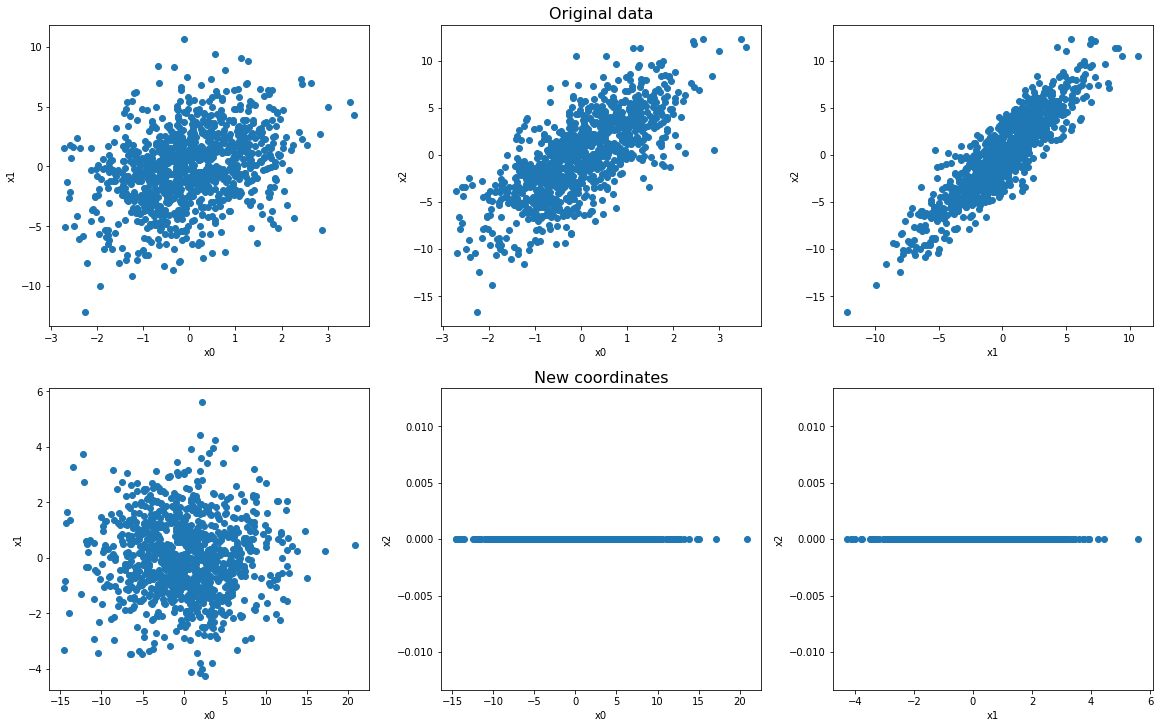

In [132]:
# plotting the results
fig, ax = plt.subplots(2, 3, constrained_layout=True)
fig.set_size_inches(16, 10)
ax[0,1].set_title("Original data", fontsize=16)
ax[1,1].set_title("New coordinates", fontsize=16)

ax[0,0].scatter(D[0,:], D[1,:])
ax[0,0].set_xlabel("x0")
ax[0,0].set_ylabel("x1")

ax[0,1].scatter(D[0,:], D[2,:])
ax[0,1].set_xlabel("x0")
ax[0,1].set_ylabel("x2")

ax[0,2].scatter(D[1,:], D[2,:])
ax[0,2].set_xlabel("x1")
ax[0,2].set_ylabel("x2")

# with new coordinates
ax[1,0].scatter(D1[0,:], D1[1,:])
ax[1,0].set_xlabel("x0")
ax[1,0].set_ylabel("x1")


ax[1,1].scatter(D1[0,:], D1[2,:])
ax[1,1].set_xlabel("x0")
ax[1,1].set_ylabel("x2")

ax[1,2].scatter(D1[1,:], D1[2,:])
ax[1,2].set_xlabel("x1")
ax[1,2].set_ylabel("x2")

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [140]:
# create 10 variables from normal distribution for noise
N = 1000
noise = [np.random.normal(0, 1, N)/50 for i in range(10)] # each row of 1000 samples represents noise

# D is the dataset from previous exercise
D2 = np.vstack([D, noise[0], noise[1], noise[2], noise[3], noise[4], noise[5],
               noise[6], noise[7], noise[8], noise[9]])

In [141]:
# PCA using scipy
cov = np.cov(D2)
l, V = la.eig(cov)
i = l.argsort()[::-1] # sort, in this way I have the same order of the eigenvalues and eigenvectors in the two methods
l = l[i]
V = V[:,i]
print("Eigenvalues: ", l)
print("Eigenvectors: \n", V)

Eigenvalues:  [ 2.76111236e+01+0.j  2.04510064e+00+0.j  4.73397088e-04+0.j
  4.53062789e-04+0.j  4.46091989e-04+0.j  4.33741209e-04+0.j
  3.95081653e-04+0.j  3.84210058e-04+0.j  3.79273621e-04+0.j
  3.65482219e-04+0.j  3.47515358e-04+0.j  3.35133130e-04+0.j
 -1.16156593e-15+0.j]
Eigenvectors: 
 [[-1.20469499e-01 -5.64641509e-01  1.15767892e-04 -1.94704920e-04
   1.94449738e-04  3.65601791e-04  3.01726832e-04  1.77012078e-05
  -6.46518774e-05  9.67411805e-05 -2.66306003e-04 -3.44036222e-05
   8.16496581e-01]
 [-5.71072619e-01  7.12185954e-01 -1.45012057e-04  7.76056272e-05
  -7.64650043e-05 -3.99867981e-04 -4.37244317e-04  1.38588560e-04
  -1.53483475e-05 -6.26081629e-05  2.90704878e-04  2.69486371e-04
   4.08248290e-01]
 [-8.12011617e-01 -4.17097063e-01  8.65237273e-05 -3.11804213e-04
   3.12434472e-04  3.31335601e-04  1.66209347e-04  1.73990976e-04
  -1.44652102e-04  1.30874198e-04 -2.41907127e-04  2.00679127e-04
  -4.08248290e-01]
 [ 2.20146238e-04  4.92437946e-04  5.58771338e-01 -1.

With two first PC information retained:  1.0
All the other variables have only a vary small percentage of information so they can be discarded and obtain nearly the same results


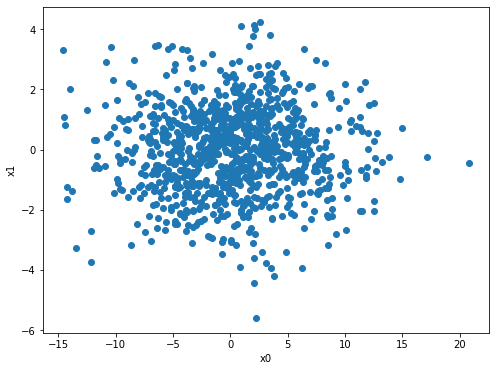

In [155]:
pc_perc = np.real(np.sum(l[:12])/np.sum(l)) # with 2 principal components 100%, while with the first about 93%
print("With two first PC information retained: ", pc_perc)
print("All the other variables have only a vary small percentage of information so they can be discarded and obtain nearly the same results")

# Redefine the data in the basis yielded by the PCA procedure
V = V[:, :2]
D3 = np.dot(V.T,D2) # new dataset

# scatter plot for the first two principal components as in the exercise before
plt.figure(figsize=(8, 6))
plt.xlabel("x0")
plt.ylabel("x1")
plt.scatter(D3[0,:], D3[1,:])

As in the first exercise, the information is retained in the first two principal components. In the first case because the third variable was a linear combination and no information is added, in this case because the information added by all the 10 variables is only a little noise, and therefore not useful.

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [ ]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 